# Diabetes Project

**Project description**

About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. 

The **objective** of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. 

Several constraints were placedon the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df=pd.read_csv(r'C:\Nimish\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


From the above dataset we see that we have 768 rows and 9 columns from which shows us the data of females who are above the age of 21 and tell us whether they have diabetes or not according to various independent variables. So  our target variable in this dataset will be **Outcome**. And as outcome has only 2 outcomes 0 (no diabetes) and 1 (diabetes),we can state that its a **classification problem**.

## Exploratory Data Analysis (EDA)

In [5]:
df.duplicated().sum()

0

From above we confirm that there is no duplicated data present in our dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From above we see that there are no null values present and the dataset doesnt contain any object datatype.

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From above details we notice the following-
1. Mean, Standard deviation and Minimum and Maximum value for each column.
2. As we see that mean and and median(50% value) are somewhat different in some columns so the **data might be skewed**. So , we will check for the same and treat them accordingly.
3. As 75% values and the maximum values have huge differences in some columns so there may be a case where there are **outliers present** in our dataset which we will check for and remove accordingly.

### Visualisation

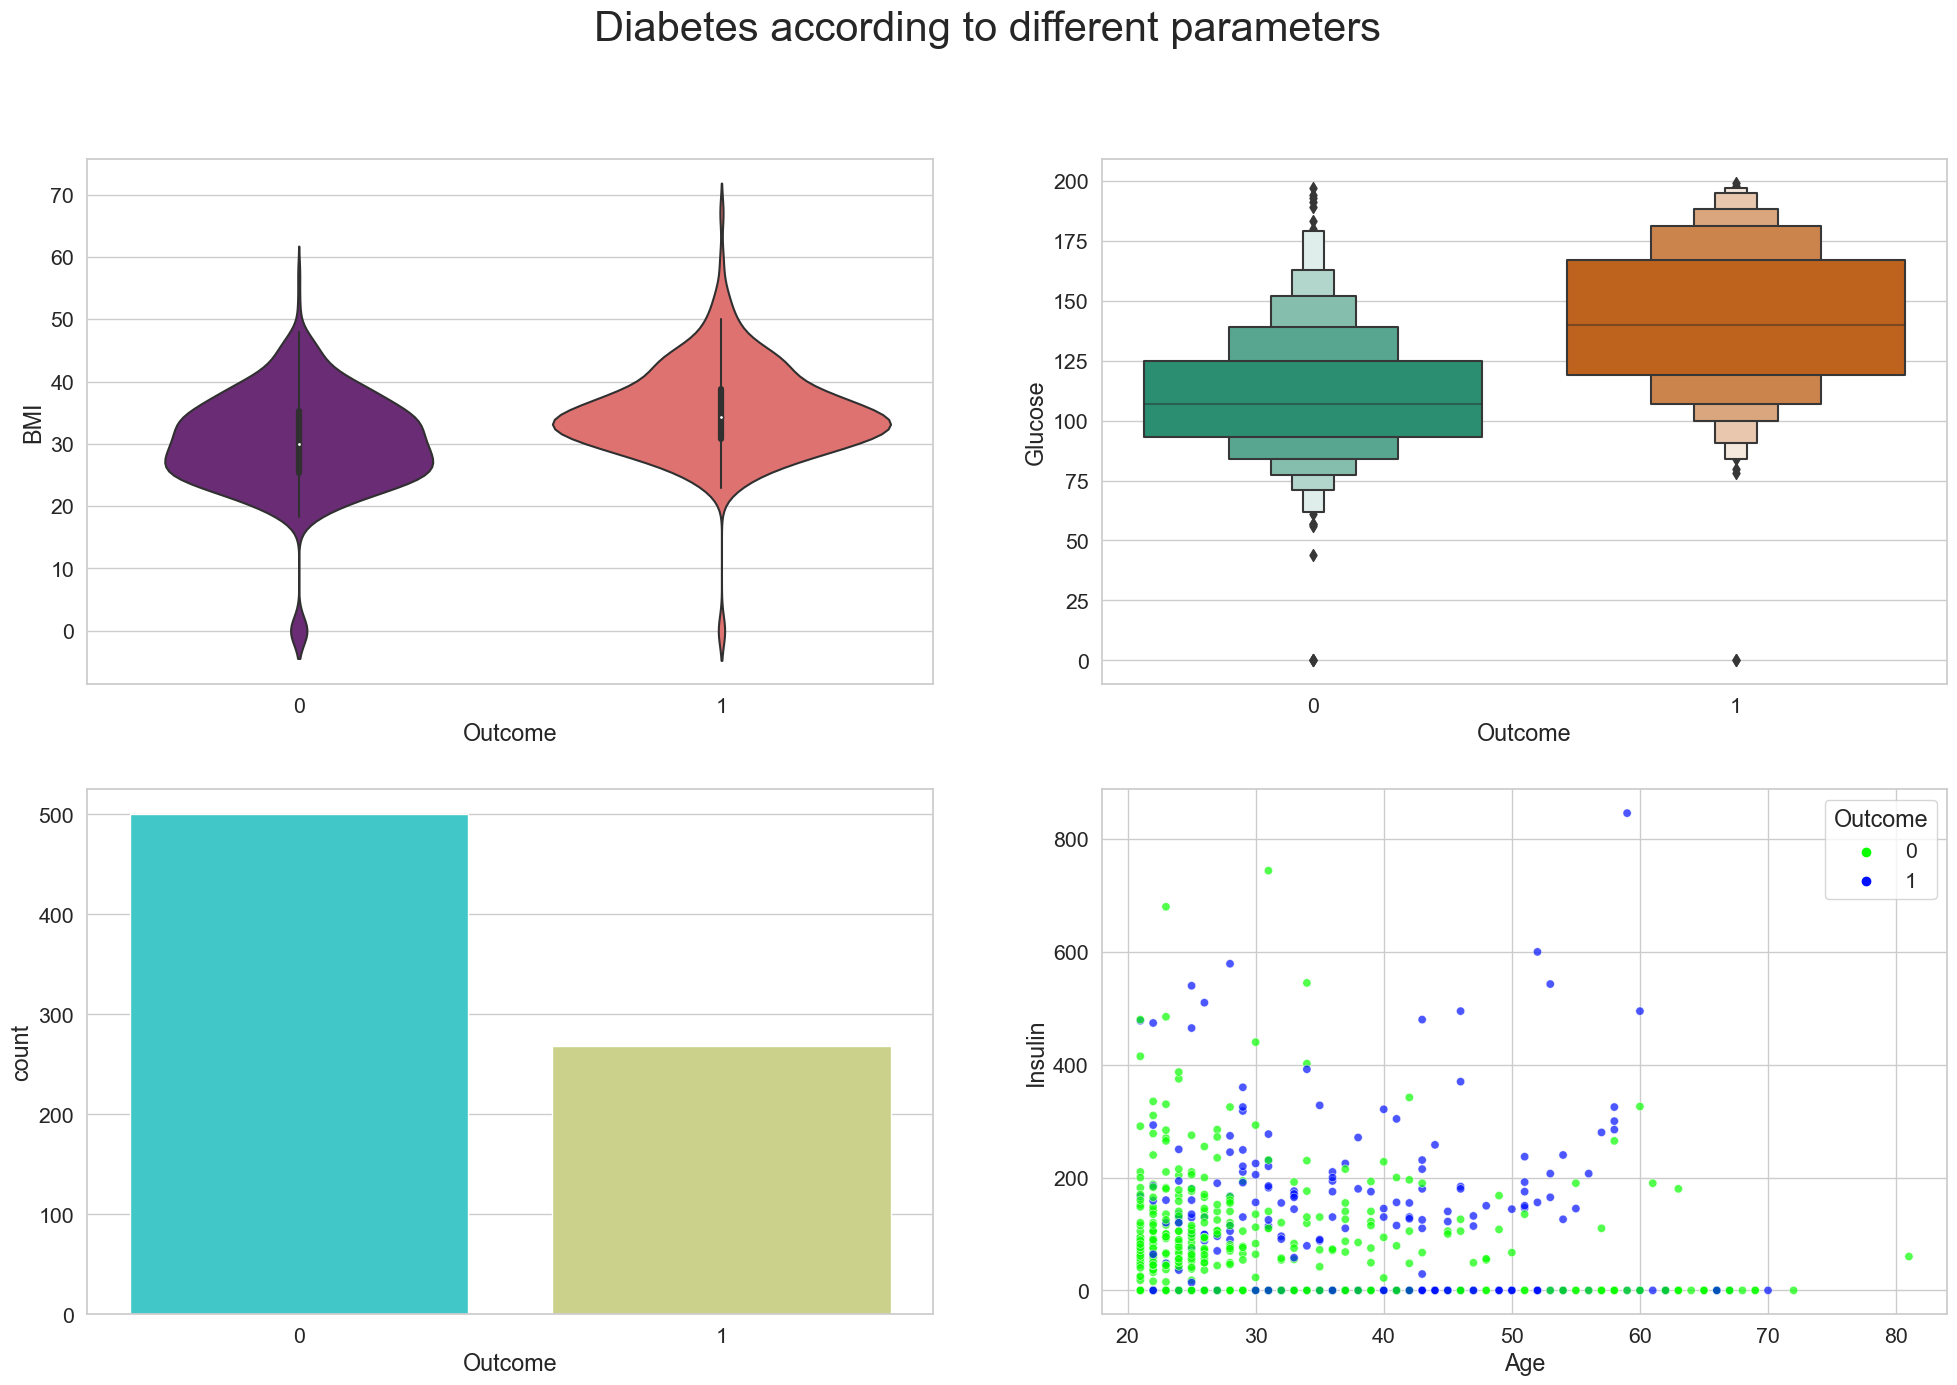

In [86]:
sb.set(font_scale=1.4)
sb.set_style('whitegrid')
fig,axes = pt.subplots(2, 2, figsize=(24,15))
fig.suptitle('Diabetes according to different parameters',fontsize=30) 
sb.violinplot(ax=axes[0, 0],x='Outcome',y='BMI',data=df,palette="magma") 
sb.boxenplot(ax=axes[0, 1],y='Glucose',x='Outcome', data=df,palette="Dark2")
sb.countplot(ax=axes[1, 0],x='Outcome',data=df,palette="rainbow")
sb.scatterplot(ax=axes[1, 1],y='Insulin',x='Age',hue='Outcome',data=df,palette="hsv",alpha=0.7)
pt.show()

From above graphs we notice that-
1. Most of the women with diabetes have BMI in the range of 30-40 and more. So, this tells that having a BMI **more than 30 may lead to diabetes**.
2. There is a high possibility for women with **glucose more than 125 to have diabetes**, as most of the women having diabetes have glucose in the same range and even higher.
3. **Our sample is imbalanced** as number of women with no diabetes are present more in our dataset. We will balance the data for better predictions.
4. We see that **people with diabetes tend to have higher insulin levels as compared to people with no diabetes** as the age increases, which may be caused by body's resistance to insulin levels in the body as the age increases.

### Multivariate Data Analysis ( heatmap)

<Axes: >

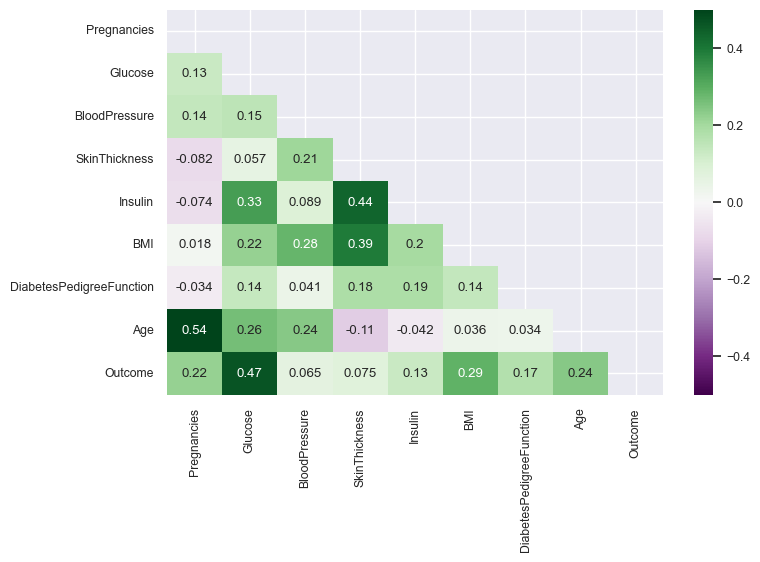

In [114]:
pt.figure(figsize=(8,5))
sb.set(font_scale=0.8)
sb.heatmap(df.corr(),mask=np.triu(df.corr()),annot=True,vmin=-0.5,vmax=0.5,cmap='PRGn')

From above heatmap we see the correaltion between each column. And the correlation range is (-1 to 1) in which -1 mean strong negative correlation and 1 means strong positive correlation, whereas close to 0 means no correaltion at all. So from above we see that outcome has positive realtion with almost every variable except Blood Pressure and Skin Thickness.

## Checking for outliers and removing using Zscore

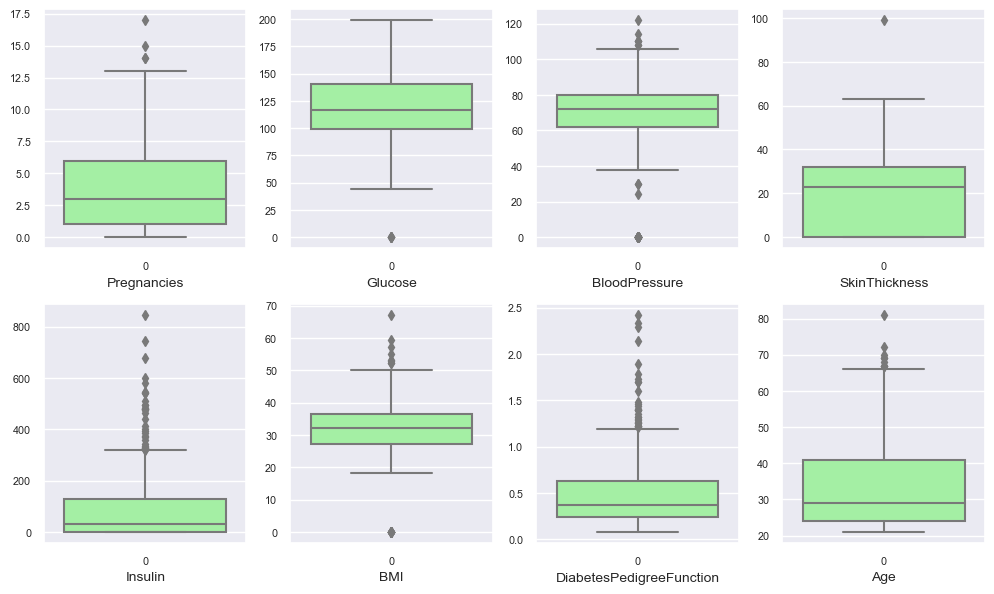

In [117]:
pt.figure(figsize=(10,6))
sb.set(font_scale=0.7)
p=1
for i in df.columns:
    if p<=8:
        ax=pt.subplot(2,4,p)
        sb.boxplot(df[i],color='palegreen')
        pt.xlabel(i,fontsize=10)
    p+=1
pt.tight_layout()

From above we see that there are outliers present in almost every column. So we will be using zscore to remove them.

In [124]:
from scipy.stats import zscore
z=np.abs(zscore(df))
thershold=3
df1=df[(z<3).all(axis = 1)]
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (768, 9)
Shape of the dataframe after removing outliers:  (688, 9)
Percentage of data loss post outlier removal:  10.416666666666668


As the acceptable range of data loss is till 10%, so our data loss is somewhat in the range and hence we will continue with the new data.

## Checking for skewness

Pregnancies                 0.814931
Glucose                     0.574478
BloodPressure               0.133396
SkinThickness              -0.079466
Insulin                     1.252364
BMI                         0.374415
DiabetesPedigreeFunction    1.181635
Age                         1.047105
Outcome                     0.724938
dtype: float64

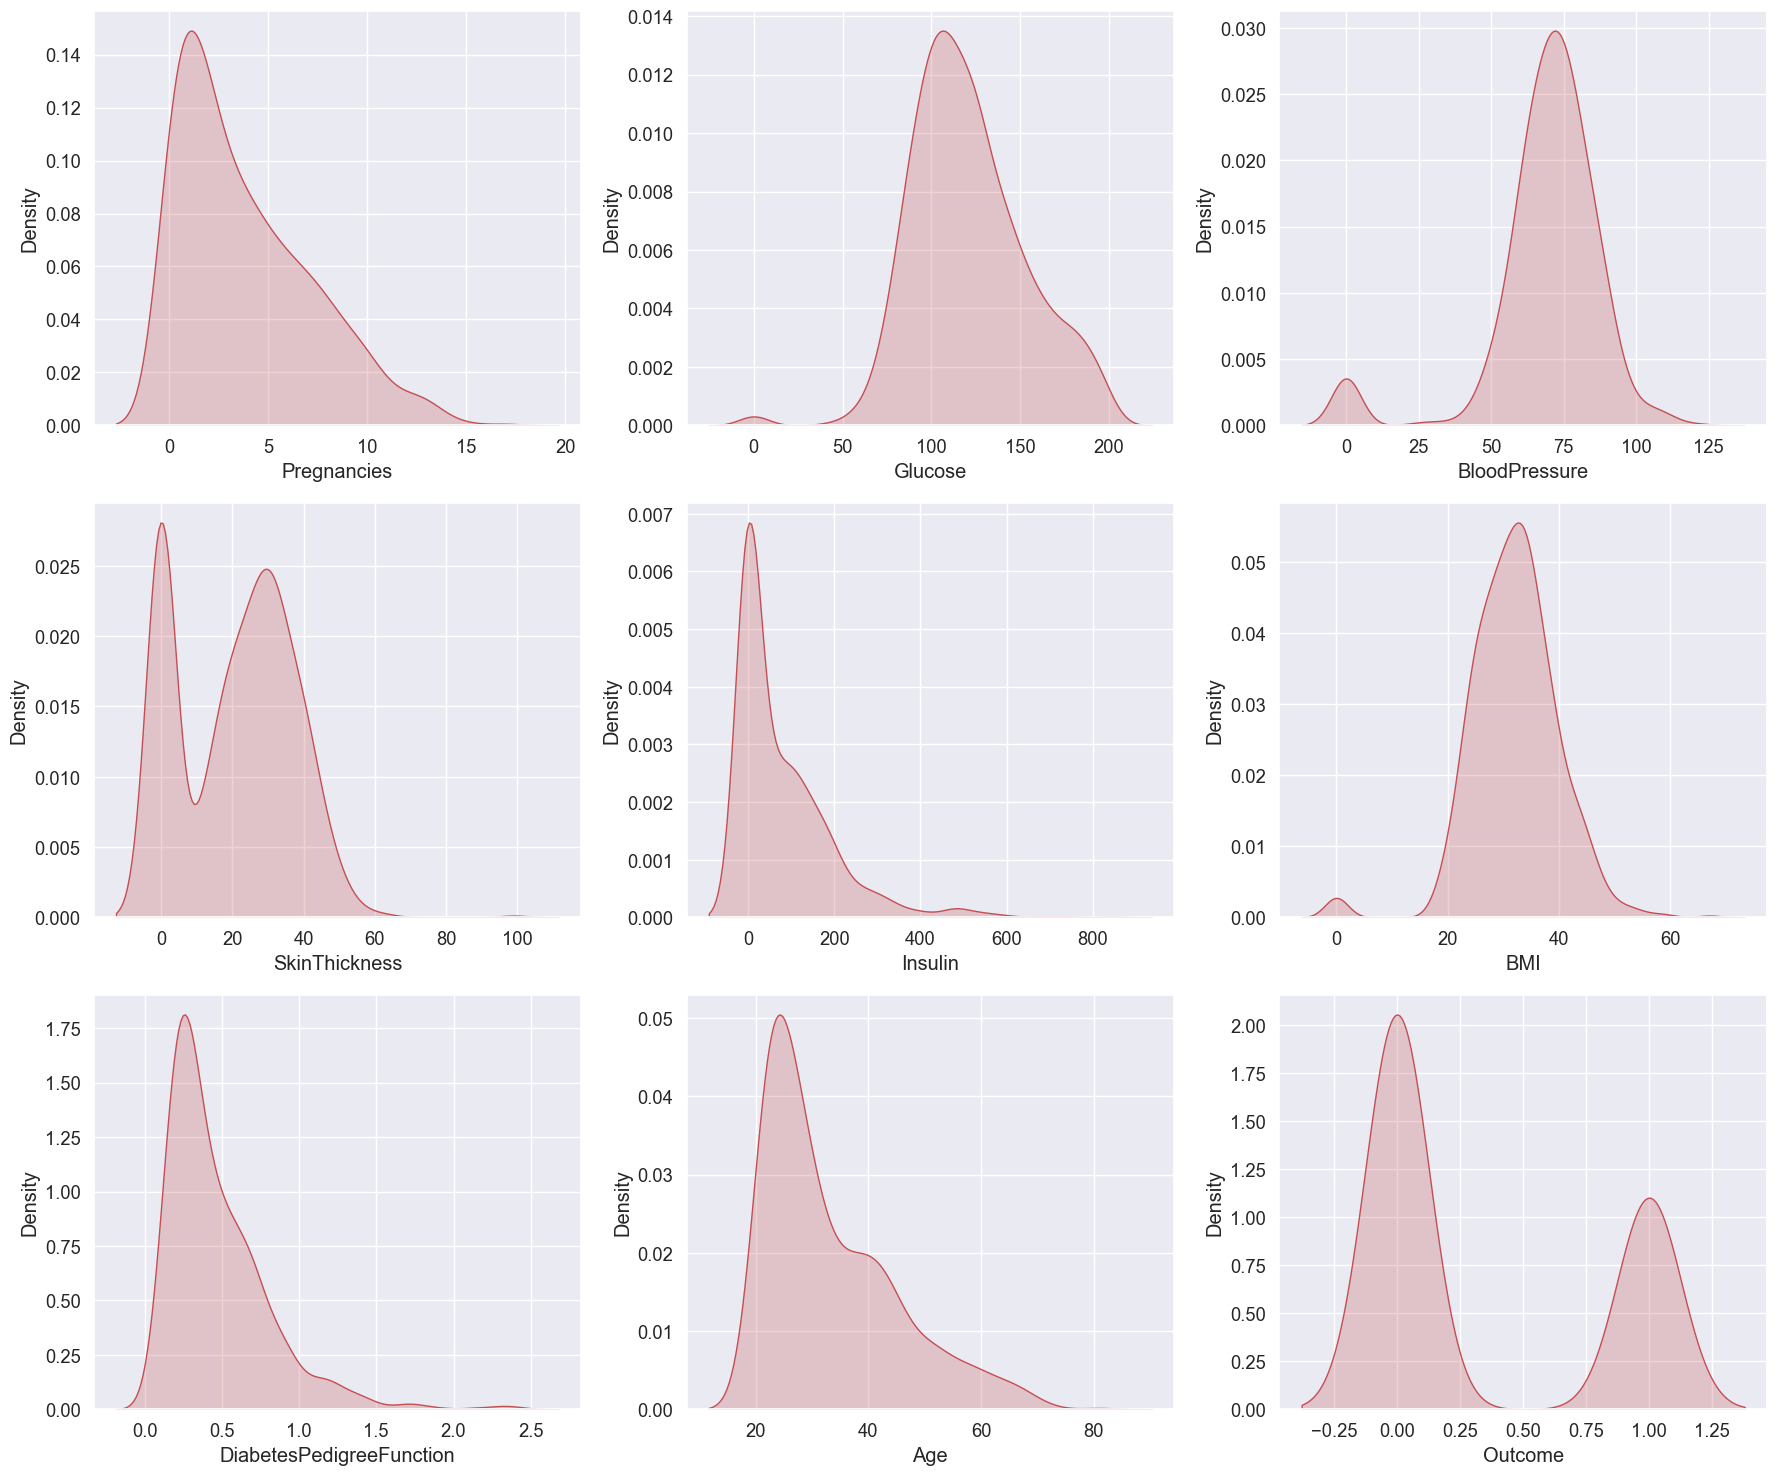

In [121]:
pt.figure(figsize=(18,15))
sb.set(font_scale=1.2)
p=1
for i in df1.columns:
    if p<=9:
        ax=pt.subplot(3,3,p)
        sb.kdeplot(x=df[i],shade=True,color='r')
        p+=1
pt.tight_layout()
df1.skew()

From above graphs we see that there is skewness present in some columns as there is no bell shaped curved and the range of accepting skewness is around -0.5 to 0.5. So we will be removing skewness from Diabetes predigree function and insulin using cbrt method.

In [125]:
df1['DiabetesPedigreeFunction']=np.cbrt(df1['DiabetesPedigreeFunction'])
df1['Insulin']=np.cbrt(df1['Insulin'])
df1['Age']=np.cbrt(df['Age'])

In [126]:
df1.skew()

Pregnancies                 0.814931
Glucose                     0.574478
BloodPressure               0.133396
SkinThickness              -0.079466
Insulin                     0.115696
BMI                         0.374415
DiabetesPedigreeFunction    0.393644
Age                         0.715818
Outcome                     0.724938
dtype: float64

We can see that skewness is removed now

## Standard Scaling

In [127]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [129]:
#splitting the dataset on the basis of dependent and independent variables
x=df1.drop(columns=['Outcome'])
y=df1['Outcome']

In [130]:
x=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.657355,0.924040,-0.028115,0.923219,-1.017304,0.210285,0.775009,1.478762
1,-0.868490,-1.177082,-0.515765,0.533462,-1.017304,-0.848063,-0.214167,-0.089442
2,1.267694,2.091330,-0.678315,-1.350366,-1.017304,-1.346999,0.906493,0.007142
3,-0.868490,-1.043678,-0.515765,0.143704,0.744775,-0.621274,-1.231040,-1.194701
4,0.352186,-0.143197,0.134435,-1.350366,-1.017304,-0.999256,-1.000414,-0.188127


We can see that the data is been scaled now as before every column had different scales.

## Checking for Multicollinearity using VIF values

In [131]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['vif'] = [variance_inflation_factor(x,i) for i in range(x.shape[1])]
vif

,Features,vif
0,Pregnancies,1.568822
1,Glucose,1.192241
2,BloodPressure,1.281598
3,SkinThickness,1.717531
4,Insulin,1.590945
5,BMI,1.334752
6,DiabetesPedigreeFunction,1.067855
7,Age,1.802007


As we know that acceptable values of VIF are upto 5, so our data contains no multicollinearity as all our values are way below 5.

## Balancing the Data using SMOTE

In [168]:
from imblearn.over_sampling import SMOTE
os=SMOTE()
y.value_counts()

0    461
1    227
Name: Outcome, dtype: int64

In [169]:
x,y=os.fit_resample(x,y)
y.value_counts()

1    461
0    461
Name: Outcome, dtype: int64

Now our data is balanced, so we will start building models now

## Model Building

In [170]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [171]:
models=[GaussianNB(),LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC(),GradientBoostingClassifier()]

### Finding the best random state

In [172]:
maxAcc = 0
maxRS = 0

for i in range(1,50):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state=i)
    for m in models:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        pred = m.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc>maxAcc:
            maxAcc = acc
            maxRs=i
print("Best Accuracy is:", maxAcc, "on Random State:", maxRs)

Best Accuracy is: 0.8614718614718615 on Random State: 45


So the best random state is 45

In [173]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.25)

## Every model with its metrics

In [176]:
for m in models:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('\033[1m','For' ,m,'\033[0m','Accuracy score is: ',accuracy_score(y_test,predm))
    print ('\n','Confusion matrix:','\n',confusion_matrix(y_test,predm))
    print ('\n','Classification Report:','\n',classification_report(y_test,predm))
    cvs=cross_val_score(m,x,y)
    print('Cross Validation Score=',cvs.mean(),'\n')
    print('*'*80)

 For GaussianNB()  Accuracy score is:  0.7445887445887446

 Confusion matrix: 
 [[88 31]
 [28 84]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       119
           1       0.73      0.75      0.74       112

    accuracy                           0.74       231
   macro avg       0.74      0.74      0.74       231
weighted avg       0.74      0.74      0.74       231

Cross Validation Score= 0.7321327849588719 

********************************************************************************
 For LogisticRegression()  Accuracy score is:  0.7619047619047619

 Confusion matrix: 
 [[90 29]
 [26 86]]

 Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77       119
           1       0.75      0.77      0.76       112

    accuracy                           0.76       231
   macro avg       0.76      0.76      0.76       231
weighted avg   

From above results we see that **Random Forest Classifier is working the best** as even though it has 2nd most accuracy score on seen data (85%, SVC with the most 86%) it is performing better on unseen data as confirmed by cross validation score (83%). So we will be using this classifier and will use hyperparameter tuning on it.

In [181]:
from sklearn.model_selection import GridSearchCV
param = {'max_features':['auto','sqrt','log2'],
      'max_depth':[5,10,15,20,25],
      'criterion':['gini','entropy']}
gcs=GridSearchCV(RandomForestClassifier(),param,cv=5)
gcs.fit(x_train,y_train)
gcs.best_params_

{'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2'}

In [183]:
fmodel=RandomForestClassifier(max_features='log2',criterion='gini',max_depth=10)
fmodel.fit(x_train,y_train)
pred=fmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.28138528138528


## AUC ROC curve

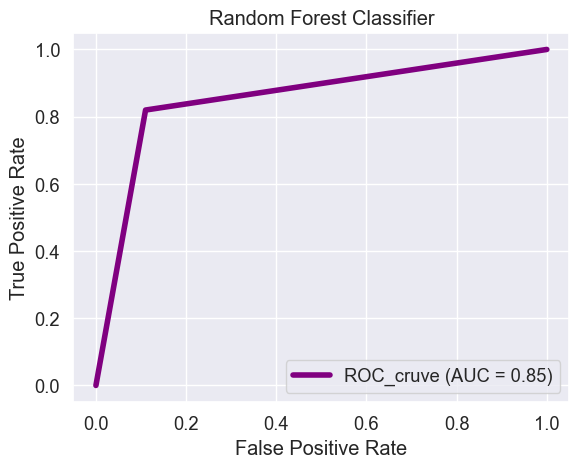

In [186]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(pred, y_test)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='ROC_cruve')
display.plot(lw=4,color='purple')
pt.title('Random Forest Classifier')
pt.show()

From above we see that our curve is covering 85% of the area which states that our model is able to predict with 85% of the accuracy which is good in terms of prediction accuracy.

## Plotting confusion Matrix 

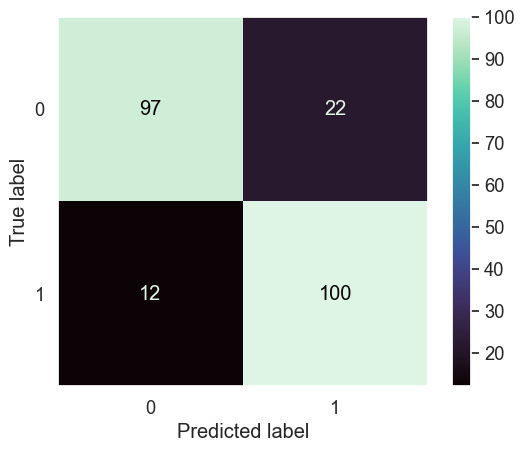

In [187]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
cm_display = ConfusionMatrixDisplay(cm).plot(cmap='mako')
pt.grid(False)

The confusion matrix tells us our accuracy as-
1. Our model has predicted 97 cases with no diabetes as correct.
2. 12 cases with diabetes has been termed as no diabetes by our model.
3. 22 cases with no diabetes have been classified as diabetes.
4. 100 cases with diabetes have been correctly predicted.